In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

C:\Users\anees\AppData\Local\Temp\ipykernel_13052\3748546470.py:1: DtypeWarning: Columns (54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


In [96]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'ball.1', 'noball', 'wide', 'byes', 'legbyes',
       'cur_bat_runs', 'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts',
       'cur_bowl_runs', 'inns_runs', 'inns_wkts', 'inns_balls',
       'inns_runs_rem', 'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target',
       'max_balls', 'date', 'year', 'ground', 'country', 'winner', 'toss',
       'competition', 'bat_hand', 'bowl_style', 'bowl_kind', 'batruns',
       'ballfaced', 'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone',
       'pitchLine', 'pitchLength', 'shotType'],
      dtype='object')

In [97]:
df.head()

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType
0,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,1,1001349_1_1_1,...,0,1,0,True,208,178,3,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
1,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,2,1001349_1_1_2,...,0,1,0,True,243,175,3,ON_THE_STUMPS,GOOD_LENGTH,DEFENDED
2,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001349_1_1_3,...,1,1,1,True,189,242,4,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
3,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001351_1_1_3,...,0,1,0,True,166,194,5,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,DEFENDED
4,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,4,1001351_1_1_4,...,4,1,4,True,15,222,6,OUTSIDE_OFFSTUMP,GOOD_LENGTH,CUT_SHOT


In [3]:
df[(df['ball']>11)][['team_bat','team_bowl','inns','ball','over','date','competition']]

,team_bat,team_bowl,inns,ball,over,date,competition
165211,Titans,Dolphins,1,12,17,2016-11-20,CSA T20 Challenge
328978,Dolphins,Lions,1,13,17,2015-11-04,Ram Slam T20 Challenge
328979,Dolphins,Lions,1,12,18,2015-11-04,Ram Slam T20 Challenge
428555,Panadura Sports Club,Sri Lanka Army,1,12,4,2021-03-07,SLC T20
622199,Kurunegala Youth Cricket Club,Sri Lanka Navy Sports Club,2,12,1,2022-06-12,Clubs T20
...,...,...,...,...,...,...,...
1434990,Sebastianites Cricket and Athletic Club,Colts Cricket Club,1,23,8,2023-06-07,Clubs T20
1434991,Sebastianites Cricket and Athletic Club,Colts Cricket Club,1,24,8,2023-06-07,Clubs T20
1505956,Malaysia,Hong Kong,1,12,4,2023-09-19,T20I
1507031,Papua New Guinea,Malaysia,2,12,1,2023-09-20,T20I


In [12]:
df[(df['ball']>11)].to_csv('docs/uncleandata.csv')

These very low level T20 leagues, the data quality is often not reliable. Hence, this should explain very high ball values.

In [100]:
df=df[(df['ball']<=11)]

In [101]:
df.shape

(1554887, 55)

In [102]:
df[df['ball']!=df['ball.1']]

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType


ball.1 is duplicate of attribute ball.

In [5]:
df=df.drop(columns='ball.1')
df.shape

(1555016, 54)

In [104]:
df['bowl_style'].unique()

array(['RF', 'RFM', 'LB', 'LWS', 'RMF', 'SLA', 'OB', 'LBG', 'LFM', 'LF',
       'RM', 'LMF', 'RM/OB', 'LM', 'LFM/SLA', 'OB/LB', 'LM/SLA/LWS',
       'OB/SLA', 'RAB', 'LS', '-', 'LSM', 'RSM', 'RMF/OB', 'RFM/OB',
       'OB/LBG', 'RFM/LBG', 'RM/LB', 'RM/LBG', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'LAB', 'RMF/LB', 'RFM/LB', 'RM/OB/LB', 'RS'],
      dtype=object)

In [105]:
#df.iloc[:1000].to_excel('t20sample_data.xlsx', index=False)

In [6]:
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
result = pd.concat([df[df['bowl_style'] == style][['bowl','bowl_style']].drop_duplicates().head(2) for style in unique_styles])
result.head()

,bowl,bowl_style
2276,Nuwan Kulasekara,RFM
3078,Vikum Sanjaya,RFM
7715,Asela Gunaratne,RMF
28810,Andrew Tye,RMF
20353,Fawad Ahmed,LBG


There are few bowling types which have ambiguous values. So after researching the bowlers, we came to know:
1. RFM, RMF means Right Arm Medium Fast
2. LFM, LMF means Left Arm Medium Fast
2. LBG, LB means Leg Break, which is usually right arm wrist spin bowlers
3. LS, SLA means Slow Left Arm Offie
4. OB means Right Arm Offie
5. RAB,LAB means Right/Left Arm Bowler, who is likely a part timer who don't have any particular style. Thus we are converting them to RSM(right arm slow medium) and LSM(left arm slow medium). 
Now we are changing these values into more understandable format.

In [7]:
df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
df['bowl_style'] = df['bowl_style'].replace(['LFM', 'LMF'], 'LFM')
df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
       'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
       'RM/OB/LB']
replacements = {
    'RFM': 'RFM',
    'RMF': 'RFM',
    'LFM': 'LFM',
    'LMF': 'LFM',
    'LBG': 'RWS',
    'LB': 'RWS',
    'LS': 'SLA',
    'SLA': 'SLA',
    'RAB': 'RS',
    'LAB': 'LS'
}

# Iterate over unique styles and apply replacements
for style in unique_styles:
    replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
    df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'RM/OB',
       'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM', '-',
       'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LFM/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [108]:
df.describe()

,p_match,inns,p_bat,p_bowl,ball,score,p_out,over,noball,wide,...,inns_rrr,target,max_balls,year,batruns,ballfaced,bowlruns,wagonX,wagonY,wagonZone
count,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,...,734761.000000,734761.000000,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06
mean,1.189248e+06,1.472549e+00,5.063180e+05,5.669501e+05,3.620968e+00,1.278893e+00,5.063946e+05,1.002362e+01,5.714242e-03,3.919577e-02,...,10.341222,160.467487,8.801454e+01,2.019634e+03,1.208241e+00,9.675295e-01,1.253151e+00,8.543081e+01,8.985982e+01,2.142561e+00
std,1.508010e+05,4.992461e-01,3.745934e+05,3.755675e+05,1.818188e+00,1.574937e+00,3.746332e+05,5.640178e+00,9.165568e-02,2.557577e-01,...,14.148465,34.966115,5.238543e+01,2.554422e+00,1.586408e+00,1.772462e-01,1.579413e+00,1.103071e+02,1.100803e+02,2.660337e+00
min,7.223350e+05,1.000000e+00,4.068000e+03,4.068000e+03,1.000000e+00,0.000000e+00,4.068000e+03,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,2.015000e+03,-4.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.125649e+06,1.000000e+00,2.498660e+05,2.976300e+05,2.000000e+00,0.000000e+00,2.498660e+05,5.000000e+00,0.000000e+00,0.000000e+00,...,6.720000,140.000000,0.000000e+00,2.018000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.213058e+06,1.000000e+00,4.228760e+05,4.937730e+05,4.000000e+00,1.000000e+00,4.229650e+05,1.000000e+01,0.000000e+00,0.000000e+00,...,8.620000,161.000000,1.200000e+02,2.020000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.304057e+06,2.000000e+00,7.235730e+05,8.376110e+05,5.000000e+00,1.000000e+00,7.243810e+05,1.500000e+01,0.000000e+00,0.000000e+00,...,10.880000,182.000000,1.200000e+02,2.022000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.780000e+02,1.890000e+02,4.000000e+00
max,1.412550e+06,2.000000e+00,1.414161e+06,1.413607e+06,1.100000e+01,8.000000e+00,1.414161e+06,2.100000e+01,6.000000e+00,6.000000e+00,...,1002.000000,315.000000,3.000000e+02,2.023000e+03,7.000000e+00,1.000000e+00,8.000000e+00,4.150000e+02,4.660000e+02,8.000000e+00


We can see that the attributes batruns and bowlruns has negative values which is the errors in the data. These data should be removed

In [8]:
df=df[(df['batruns']>=0) & (df['bowlruns']>=0)]
df.shape

(1554800, 54)

Understanding WagonX, WagonY and WagonZone attributes

In [110]:
df.groupby(['wagonZone']).agg({'wagonX':'mean','wagonY':'mean'}).reset_index()

,wagonZone,wagonX,wagonY
0,0,0.000000,0.000000
1,1,228.723680,66.956557
2,2,279.865352,126.732172
3,3,284.986903,212.424818
4,4,221.928538,270.105581
5,5,137.538450,268.838547
6,6,84.483881,207.445834
7,7,86.823447,128.386469
8,8,151.927968,93.099248


In [111]:
df_rankings=pd.read_csv("docs/T20ranking.csv")
df_rankings['Team']

0            India
1          England
2        Australia
3      New Zealand
4         Pakistan
5     South Africa
6      West Indies
7        Sri Lanka
8       Bangladesh
9      Afghanistan
10         Ireland
11         Namibia
12        Zimbabwe
13        Scotland
14     Netherlands
15           Nepal
16             UAE
17            Oman
18             PNG
19          Canada
Name: Team, dtype: object

In [112]:
df_rankings['Team']=df_rankings['Team'].replace('UAE','United Arab Emirates').replace('PNG','Papua New Guinea')

In [113]:
df['competition'].unique()

array(['T20I', 'IPL', 'SL2020', 'BPL 2017', 'SLC Twenty-20 Tournament',
       'BPL 2019', 'AUS v SL', 'SLC T20', 'Bangladesh Premier League',
       'T20 Blast', 'Clubs T20', 'Super T20 Provincial Tournament',
       'AIA Premier T20 Tournament', 'LPL', 'Afghanistan PL', 'CPL',
       'BPL 2016', 'PSL', 'BPL', 'Big Bash League', 'BBL',
       "Men's Hundred", 'Ram Slam T20 Challenge',
       'England tour of South Africa', "Men's 100", 'MSL', 'MSL 2018',
       'Super Smash', 'Cool & Cool Presents Haier Super8 T20 Cup',
       'Cool and Cool Presents Haier Mobile T-20 Cup', 'National T20 Cup',
       'National T20', 'PAK-A v NZ-A T20s',
       'Scotland in United Arab Emirates T20I Match', 'LIONS in UAE',
       'Pakistan A v England Lions unofficial T20I Series',
       'CSA T20 Challenge', 'Ram Slam T20',
       'CSA Provincial T20 Challenge', 'Syed Mushtaq Ali Trophy',
       'SMA TROPHY', 'Shpageeza CL', 'SCL', 'SMA TROPHY FINAL',
       'ENG v IND', 'BBDHU T20', 'Dhaka T20', 'CSA

In [114]:
relevant_competitions=['T20I', 'IPL', 'AUS v SL','T20 Blast','LPL', 'CPL', 'PSL', 'Big Bash League', 'BBL',
       "Men's Hundred",'MSL', 'MSL 2018','Super Smash','National T20 Cup', 'National T20', 'PAK-A v NZ-A T20s',
       'CSA T20 Challenge','CSA Provincial T20 Challenge', 'Syed Mushtaq Ali Trophy','SMA TROPHY','SMA TROPHY FINAL',
        'ENG v IND',  'CSA T20', 'Provincial T20','Africa T20 Cup',
       'PRO T20', 'Ireland A in Bangladesh unofficial T20I Series', 
       'Inter Pro T20', 'Hong Kong tour of Namibia','Ireland A in Namibia T20s', 'SA20',
       'PSL 2023', 'IPL 2023', 'CPL 2023']

In [115]:
df.shape

(1554671, 54)

In [116]:
df=df[df['competition'].isin(relevant_competitions)]
df.shape

(1260474, 54)

In [117]:
df=df[(((df['competition']=='T20I') & (df['team_bat'].isin(df_rankings['Team'])) & (df['team_bowl'].isin(df_rankings['Team']))) | (df['competition'].isin(relevant_competitions[1:])))]
df.shape

(1044525, 54)

In [118]:
#df.to_csv('docs/cleaned_data.csv',index=False)

# Best Batters

Computing the total runs scored by each batter, strike rate and their total number of matches.

In [119]:
total_runs=df.groupby(['p_bat','bat']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)
total_runs['strike rate']=(total_runs['batruns']*100/total_runs['ballfaced']).round(2)
total_runs.rename(columns={'p_match':'matches'},inplace=True)
total_runs.head()

,p_bat,bat,matches,batruns,ballfaced,strike rate
698,308967,Jos Buttler,246,8206,5615,146.14
468,232359,Colin Munro,284,7934,5588,141.98
872,348144,Babar Azam,210,7881,6104,129.11
13,5334,Aaron Finch,256,7611,5408,140.74
521,253802,Virat Kohli,210,7608,5584,136.25


Computing the total number of dismissals each batter. This is useful to calculate their batting average.

In [120]:
total_outs=df[df['out']==True].groupby(['p_bat','bat']).size().reset_index(name='count').sort_values(by='count',ascending=False)
total_outs.rename(columns={'count':'dismissals'},inplace=True)
total_outs.head()

,p_bat,bat,dismissals
495,249866,Alex Hales,257
450,232359,Colin Munro,257
730,325026,Glenn Maxwell,234
13,5334,Aaron Finch,226
622,298438,Jason Roy,225


Computing the total number of boundaries scored each batter. This is useful to calculate their boundary percentage. Higher the boundary percent, higher the risk taken by the batter.

In [121]:
df1 = df[((df['batruns']==4) | (df['batruns']==6)) & (df['ballfaced']==1)].copy()
# Counting 4s and 6s in batruns
df1['4s'] = df1['batruns'].apply(lambda x: 1 if x == 4 else 0)
df1['6s'] = df1['batruns'].apply(lambda x: 1 if x == 6 else 0)
df1[['batruns', 'ballfaced', '4s', '6s']]

,batruns,ballfaced,4s,6s
4,4,1,1,0
11,4,1,1,0
16,4,1,1,0
50,6,1,0,1
51,6,1,0,1
...,...,...,...,...
1554983,6,1,0,1
1554984,4,1,1,0
1555003,6,1,0,1
1555006,6,1,0,1


In [122]:
total_boundaries=df1[((df1['batruns']==4) | (df1['batruns']==6)) & (df1['ballfaced']==1)].groupby(['p_bat','bat']).agg({'batruns':'sum','ballfaced':'count','4s':'sum','6s':'sum'}).reset_index()
total_boundaries.rename(columns={'batruns':'boundary_runs','ballfaced':'boundary_balls'},inplace=True)
total_boundaries.head()

,p_bat,bat,boundary_runs,boundary_balls,4s,6s
0,4068,Jim Allenby,476,109,89,20
1,4292,Travis Birt,22,5,4,1
2,4451,George Bailey,1128,252,192,60
3,4493,Dean Brownlie,420,95,75,20
4,4498,Aiden Blizzard,142,33,28,5


Computing the total number of dots of each batter. This is useful to calculate their dot percentage. This is also used to evaluate the risks taken by the batter at every innings. Higher dot percent means the low risk.

In [123]:
total_dots=df[(df['batruns']==0) & (df['ballfaced']==1)].groupby(['p_bat','bat']).agg({'ballfaced':'sum'}).reset_index()
total_dots.rename(columns={'ballfaced':'dots'},inplace=True)
total_dots.head()

,p_bat,bat,dots
0,4068,Jim Allenby,265
1,4292,Travis Birt,9
2,4451,George Bailey,553
3,4493,Dean Brownlie,158
4,4498,Aiden Blizzard,113


Merging all theser metrics into single dataframe

In [124]:
merged_df=pd.merge(total_runs,total_outs,on=['p_bat','bat'])
merged_df=pd.merge(merged_df,total_boundaries,on=['p_bat','bat'])
merged_df=pd.merge(merged_df,total_dots,on=['p_bat','bat'])
merged_df['dot%']=(merged_df['dots']*100/merged_df['ballfaced']).round(2)
merged_df['boundary%']=(merged_df['boundary_runs']*100/merged_df['batruns']).round(2)
merged_df['average']=(merged_df['batruns']/merged_df['dismissals']).round(2)
#merged_df=merged_df[(merged_df['batruns']>1000) & (merged_df['matches']>10)].sort_values(by='average',ascending=False)
merged_df.head(10)

,p_bat,bat,matches,batruns,ballfaced,strike rate,dismissals,boundary_runs,boundary_balls,4s,6s,dots,dot%,boundary%,average
0,308967,Jos Buttler,246,8206,5615,146.14,215,5166,1112,753,359,2000,35.62,62.95,38.17
1,232359,Colin Munro,284,7934,5588,141.98,257,5112,1079,681,398,2050,36.69,64.43,30.87
2,348144,Babar Azam,210,7881,6104,129.11,184,4178,974,833,141,1942,31.82,53.01,42.83
3,5334,Aaron Finch,256,7611,5408,140.74,226,4700,1020,710,310,1981,36.63,61.75,33.68
4,253802,Virat Kohli,210,7608,5584,136.25,174,4058,894,653,241,1668,29.87,53.34,43.72
5,249866,Alex Hales,272,7559,5037,150.07,257,5288,1168,860,308,1876,37.24,69.96,29.41
6,296597,James Vince,241,7341,5302,138.46,222,4414,1005,808,197,1803,34.01,60.13,33.07
7,325026,Glenn Maxwell,275,7021,4633,151.54,234,4364,926,596,330,1510,32.59,62.16,30.00
8,230559,Kieron Pollard,302,6838,4591,148.94,222,4392,869,411,458,1638,35.68,64.23,30.80
9,44828,Faf du Plessis,207,6647,4819,137.93,187,3880,846,598,248,1621,33.64,58.37,35.55


In [125]:
merged_df.to_csv('docs/batting_stats.csv',index=False)

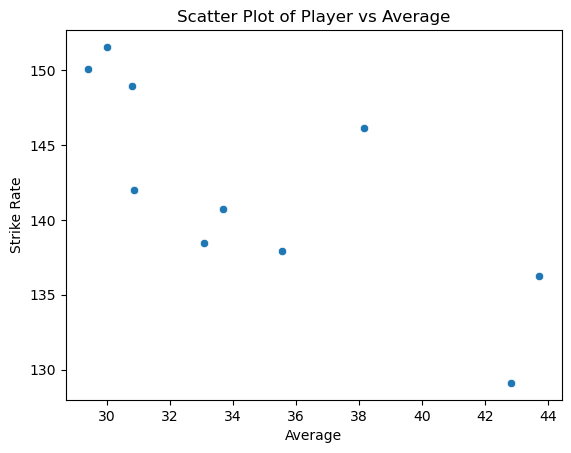

In [126]:
sns.scatterplot(merged_df[:10],x='average',y='strike rate')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Player vs Average')
plt.show()

# Best Bowlers

In [166]:
bowl_df=df.groupby(['p_bowl','bowl']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique','bowl_style':'max'}).reset_index()
bowl_df['economy']=(bowl_df['bowlruns']*6/bowl_df['ballfaced']).round(2)
bowl_df.head()

,p_bowl,bowl,bowlruns,ballfaced,p_match,bowl_style,economy
0,4068,Jim Allenby,385,277,23,RM,8.34
1,4504,Ahillen Beadle,61,48,2,SLA,7.62
2,4508,Doug Bollinger,570,403,20,LFM,8.49
3,4818,Mark Cosgrove,19,12,1,RM,9.50
4,4823,Steven Crook,774,494,35,RFM,9.40


In [167]:
df_dots=df[(df['bowlruns']==0) & (df['ballfaced']==1)].groupby(['p_bowl','bowl']).agg({'ballfaced':'sum'}).reset_index()
df_dots.rename(columns={'ballfaced':'dotballs'},inplace=True)
df_dots.head()

,p_bowl,bowl,dotballs
0,4068,Jim Allenby,90
1,4504,Ahillen Beadle,11
2,4508,Doug Bollinger,152
3,4818,Mark Cosgrove,2
4,4823,Steven Crook,132


In [168]:
bowl_df[bowl_df['p_bowl']==19139]

,p_bowl,bowl,bowlruns,ballfaced,p_match,bowl_style,economy
59,19139,Tony Palladino,89,72,3,RM,7.42


In [169]:
df_dots[df_dots['p_bowl']==19139]

,p_bowl,bowl,dotballs
59,19139,Tony Palladino,17


In [174]:
bowl_outs=df[df['out']==True].groupby(['p_bowl','bowl']).size().reset_index(name='outs')
merged_bowl=pd.merge(bowl_df,bowl_outs,on=['p_bowl','bowl'])
merged_bowl=pd.merge(merged_bowl,df_dots,on=['p_bowl','bowl'])
merged_bowl['dotballs%']=(merged_bowl['dotballs']*100/merged_bowl['ballfaced']).round(2)
merged_bowl['average']=(merged_bowl['bowlruns']/merged_bowl['outs']).round(2)
merged_bowl['strike rate']=(merged_bowl['ballfaced']/merged_bowl['outs']).round(2)
merged_bowl=merged_bowl.sort_values(by='average', ascending=True)
merged_bowl=merged_bowl[merged_bowl['ballfaced']>100]
merged_bowl.head(10)

,p_bowl,bowl,bowlruns,ballfaced,p_match,bowl_style,economy,outs,dotballs,dotballs%,average,strike rate
322,267455,Rakep Patel,134,144,8,OB,5.58,14,59,40.97,9.57,10.29
1608,1079377,Ravi Teja,200,185,8,RM,6.49,20,73,39.46,10.00,9.25
1959,1261866,John Turner,265,247,12,RFM,6.44,24,120,48.58,11.04,10.29
1017,594263,Tumelo Tlhokwe,160,157,11,OB,6.11,14,55,35.03,11.43,11.21
1301,784379,Wanindu Hasaranga,257,246,11,RWS,6.27,21,105,42.68,12.24,11.71
1222,699493,Writtick Chatterjee,100,108,6,OB,5.56,8,48,44.44,12.50,13.50
1617,1080013,Divyang Hinganekar,113,118,6,LM,5.75,9,50,42.37,12.56,13.11
1515,1000791,Bradley Currie,126,114,7,LFM,6.63,10,64,56.14,12.60,11.40
936,547756,Brett Hampton,253,194,16,RFM,7.82,20,69,35.57,12.65,9.70
371,290638,Amit Yadav,128,132,7,OB,5.82,10,61,46.21,12.80,13.20


In [175]:
merged_bowl.to_csv('docs/bowling_stats.csv',index=False)

# Batter's performaces against every bowling type

In [176]:
df.groupby(['p_bat','bat','bowl_style']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)['bowl_style'].unique()

array(['RFM', 'RF', 'RWS', 'OB', 'SLA', 'LFM', 'RM', 'LF', 'LWS', 'LM',
       'RSM', 'LSM'], dtype=object)

In [134]:
main_bowling_styles=['RFM', 'RF', 'LF', 'LFM' , 'RWS' , 'LWS', 'RM', 'LM', 'SLA', 'OB',  'RSM','LSM']

In [135]:
df=df[df['bowl_style'].isin(main_bowling_styles)]
df.shape

(1033468, 54)

In [136]:
total_runs=df.groupby(['p_bat','bat','bowl_style']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)
total_runs['strike rate']=(total_runs['batruns']*100/total_runs['ballfaced']).round(2)
total_runs.rename(columns={'p_match':'matches'},inplace=True)
total_runs.head()

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate
4476,296597,James Vince,RFM,194,2674,1871,142.92
3684,249866,Alex Hales,RFM,216,2646,1730,152.95
3327,232359,Colin Munro,RFM,205,2524,1664,151.68
6179,348144,Babar Azam,RFM,167,2491,1813,137.40
100,5334,Aaron Finch,RFM,174,2457,1617,151.95


In [137]:
total_outs=df[df['out']==True].groupby(['p_bat','bat','bowl_style']).size().reset_index(name='count').sort_values(by='count',ascending=False)
total_outs.rename(columns={'count':'dismissals'},inplace=True)
total_outs.head()

,p_bat,bat,bowl_style,dismissals
2629,249866,Alex Hales,RFM,90
3171,296597,James Vince,RFM,77
5106,403902,Liam Livingstone,RFM,75
2368,232359,Colin Munro,RFM,74
7423,571911,Joe Clarke,RFM,72


In [138]:
merged_df=pd.merge(total_runs,total_outs,on=['p_bat','bat','bowl_style'])
merged_df.columns

Index(['p_bat', 'bat', 'bowl_style', 'matches', 'batruns', 'ballfaced',
       'strike rate', 'dismissals'],
      dtype='object')

In [139]:
merged_df['average']=(merged_df['batruns']/merged_df['dismissals']).round(2)
merged_df=merged_df.sort_values(by='average',ascending=False)
merged_df.head()

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate,dismissals,average
1292,38699,Ross Taylor,LFM,28,250,153,163.40,1,250.0
1472,311158,Ben Stokes,SLA,24,225,137,164.23,1,225.0
1687,47015,Jacques Rudolph,RM,20,197,165,119.39,1,197.0
1983,603410,Ben McDermott,LWS,15,166,119,139.50,1,166.0
1999,698189,Wiaan Mulder,SLA,28,165,154,107.14,1,165.0


In [141]:
merged_df.to_excel('docs/batters_against_bowlingtype.xlsx', index=False)

In [142]:
merged_df['bowl_style'].unique()

array(['LFM', 'SLA', 'RM', 'LWS', 'OB', 'RWS', 'RF', 'RFM', 'LF', 'LM',
       'LSM'], dtype=object)

In [143]:
batters_against_rws=merged_df[merged_df['bowl_style']=='RWS'].sort_values(by='strike rate',ascending=False)
batters_against_rws.head(10)

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate,dismissals,average
7925,694211,Avesh Khan,RWS,3,18,6,300.00,2,9.0
4084,1123428,Usman Khan,RWS,4,71,28,253.57,2,35.5
8340,467350,Jonathan Foo,RWS,2,15,6,250.00,2,7.5
8296,1043925,John Matchett,RWS,1,15,6,250.00,1,15.0
9356,645319,Alex Thomson,RWS,1,10,4,250.00,1,10.0
6225,297630,Matt Coles,RWS,3,34,14,242.86,1,34.0
8560,1278203,Liam McCarthy,RWS,1,14,6,233.33,1,14.0
6719,530773,Pawan Negi,RWS,6,28,12,233.33,2,14.0
8007,348049,Nasum Ahmed,RWS,2,18,8,225.00,1,18.0
9198,543184,Sohail Mahmoud,RWS,2,11,5,220.00,1,11.0


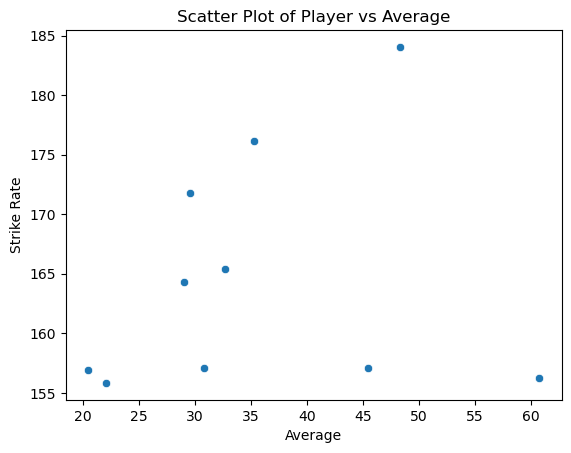

In [38]:
sns.scatterplot(data=batters_against_rws.iloc[:10],x='average',y='strike rate')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Player vs Average')
plt.show()

# Bowler's performance against right and left handed batters

In [146]:
bowl_df=df.groupby(['p_bowl','bowl','bat_hand']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique','bowl_style':'max'}).reset_index()
bowl_df['economy']=(bowl_df['bowlruns']*6/bowl_df['ballfaced']).round(2)
bowl_df.head()

,p_bowl,bowl,bat_hand,bowlruns,ballfaced,p_match,bowl_style,economy
0,4068,Jim Allenby,LHB,106,82,13,RM,7.76
1,4068,Jim Allenby,RHB,279,195,21,RM,8.58
2,4504,Ahillen Beadle,RHB,61,48,2,SLA,7.62
3,4508,Doug Bollinger,LHB,180,130,18,LFM,8.31
4,4508,Doug Bollinger,RHB,390,273,20,LFM,8.57


In [155]:
df[(df['bowlruns']==0) & (df['ballfaced']==1)]

(368087, 54)

In [147]:
bowl_outs=df[df['out']==True].groupby(['p_bowl','bowl','bat_hand']).size().reset_index(name='outs')
bowl_outs.head()

,p_bowl,bowl,bat_hand,outs
0,4068,Jim Allenby,LHB,1
1,4068,Jim Allenby,RHB,7
2,4504,Ahillen Beadle,RHB,1
3,4508,Doug Bollinger,LHB,6
4,4508,Doug Bollinger,RHB,13


In [148]:
merged_bowl=pd.merge(bowl_df,bowl_outs,on=['p_bowl','bowl','bat_hand'])
merged_bowl['average']=(merged_bowl['bowlruns']/merged_bowl['outs']).round(2)
merged_bowl['strike rate']=(merged_bowl['ballfaced']/merged_bowl['outs']).round(2)
merged_bowl=merged_bowl[(merged_bowl['p_match']>25) & (merged_bowl['ballfaced']>500)].sort_values(by='average', ascending=True)
merged_bowl.head(10)

,p_bowl,bowl,bat_hand,bowlruns,ballfaced,p_match,bowl_style,economy,outs,average,strike rate
2389,784379,Wanindu Hasaranga de Silva,RHB,1748,1588,101,RWS,6.60,122,14.33,13.02
1284,432960,Simon Harmer,LHB,816,705,94,OB,6.94,56,14.57,12.59
1669,535353,Ottniel Baartman,RHB,791,703,44,RFM,6.75,54,14.65,13.02
748,307808,Rohan Mustafa,RHB,689,570,40,OB,7.25,47,14.66,12.13
1673,535393,Senuran Muthusamy,RHB,597,579,45,SLA,6.19,40,14.92,14.48
1143,390481,Harshal Patel,RHB,1761,1294,100,RM,8.17,108,16.31,11.98
2738,960361,Sandeep Lamichhane,RHB,1803,1593,96,RWS,6.79,109,16.54,14.61
267,42699,Saeed Ajmal,RHB,703,595,38,OB,7.09,42,16.74,14.17
988,351588,Mark Wood,RHB,913,687,40,RF,7.97,54,16.91,12.72
405,52912,Ravi Rampaul,LHB,783,556,73,RFM,8.45,46,17.02,12.09


In [149]:
merged_bowl.to_excel('docs/Bowling Performaces against left and right handers.xlsx',index=False)

# WIn percentage of each International team

In [43]:
match_details=df[(df['inns']==1) & (df['winner']!='-')].groupby('p_match').agg({'team_bat':'first','team_bowl':'first','winner':'max','ground':'max','date':'max','toss':'max'}).reset_index()
match_details.head()

,p_match,team_bat,team_bowl,winner,ground,date,toss
0,722335,South Africa,West Indies,West Indies,"Newlands, Cape Town",2015-01-09,South Africa
1,722337,South Africa,West Indies,West Indies,"New Wanderers Stadium, Johannesburg",2015-01-11,West Indies
2,736063,South Africa,West Indies,South Africa,"Kingsmead, Durban",2015-01-14,West Indies
3,743953,England,New Zealand,England,"Old Trafford, Manchester",2015-06-23,England
4,743975,England,Australia,England,"Sophia Gardens, Cardiff",2015-08-31,Australia


In [44]:
teams=pd.concat([match_details['team_bat'],match_details['team_bowl']]).drop_duplicates()
teams.head()

0       South Africa
3            England
5     Sydney Thunder
6      Brisbane Heat
7    Melbourne Stars
dtype: object

In [82]:
totalwins=[]
homewins=[]
homematches=[]
awaymatches=[]
awaywins=[]
matches=[]
for t in teams:
    totalwins.append(match_details[match_details['winner']==t].shape[0])
    homewins.append(match_details[(match_details['winner']==t) & (match_details['country']==t)].shape[0])
    awaywins.append(match_details[(match_details['winner']==t) & (match_details['country']!=t)].shape[0])
    matches.append(match_details[(match_details['team_bat']==t) | (match_details['team_bowl']==t)].shape[0])
    homematches.append(match_details[((match_details['team_bat']==t) | (match_details['team_bowl']==t)) & (match_details['country']==t)].shape[0])
    awaymatches.append(match_details[((match_details['team_bat']==t) | (match_details['team_bowl']==t)) & (match_details['country']!=t)].shape[0])
team_winnings = pd.DataFrame({'Team': teams, 'Total Wins': totalwins, 'Matches':matches,
                              'Home Wins':homewins, 
                              'Home Matches':homematches,
                              'Away Wins':awaywins, 
                              'Away Matches':awaymatches
                             })
team_winnings.head()

,Team,Total Wins,Matches,Home Wins,Home Matches,Away Wins,Away Matches
0,South Africa,53,97,20,46,33,51
3,England,59,103,20,34,39,69
5,Sydney Thunder,48,98,0,0,48,98
6,Brisbane Heat,44,100,0,0,44,100
7,Melbourne Stars,47,102,0,0,47,102


In [83]:
team_winnings['Win%']=(team_winnings['Total Wins']*100/team_winnings['Matches']).round(2)
team_winnings['Home Win%']=(team_winnings['Home Wins']*100/team_winnings['Home Matches']).round(2)
team_winnings['Away Win%']=(team_winnings['Away Wins']*100/team_winnings['Away Matches']).round(2)
team_winnings=(team_winnings[(team_winnings['Matches']>50) & (team_winnings['Team'].isin(df_rankings['Team']))].sort_values(by='Win%',ascending=False)).round(2)
team_winnings

,Team,Total Wins,Matches,Home Wins,Home Matches,Away Wins,Away Matches,Win%,Home Win%,Away Win%
313,India,105,152,46,68,59,84,69.08,67.65,70.24
282,Afghanistan,62,91,0,0,62,91,68.13,NaN,68.13
248,Pakistan,74,122,18,29,56,93,60.66,62.07,60.22
215,New Zealand,67,111,32,51,35,60,60.36,62.75,58.33
3,England,59,103,20,34,39,69,57.28,58.82,56.52
0,South Africa,53,97,20,46,33,51,54.64,43.48,64.71
310,Australia,55,101,19,32,36,69,54.46,59.38,52.17
285,Netherlands,28,59,6,15,22,44,47.46,40.00,50.00
281,United Arab Emirates,29,65,14,36,15,29,44.62,38.89,51.72
392,West Indies,48,110,27,49,21,61,43.64,55.10,34.43


<Axes: xlabel='Team', ylabel='Win%'>

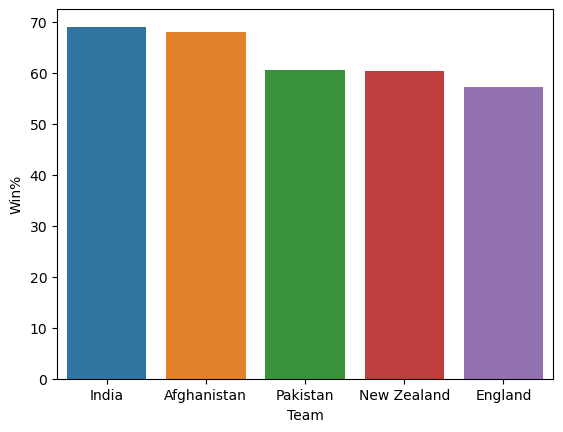

In [47]:
sns.barplot(team_winnings[:5],x='Team',y='Win%')

# Best win% in home country in internationals